In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')
dfTrain = pd.read_csv("/content/drive/MyDrive/cnn/fashion_Train.csv")
dfTest = pd.read_csv("/content/drive/MyDrive/cnn/fashion_Test.csv")

Mounted at /content/drive


In [3]:
dfTrain.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dfTest.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y_train = dfTrain.label
X_train = dfTrain.drop(["label"], axis=1)
X_test = dfTest.drop(["label"], axis=1)
Y_test = dfTest.label

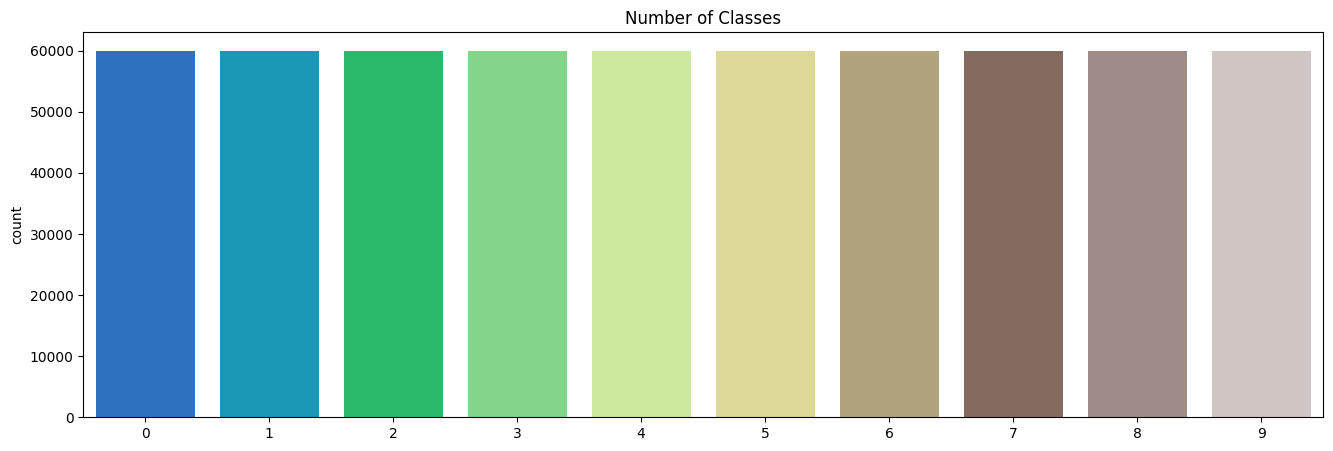

In [30]:
plt.figure(figsize=(16,5))
sns.countplot(Y_train, palette="terrain")
plt.title("Number of Classes")
plt.show()

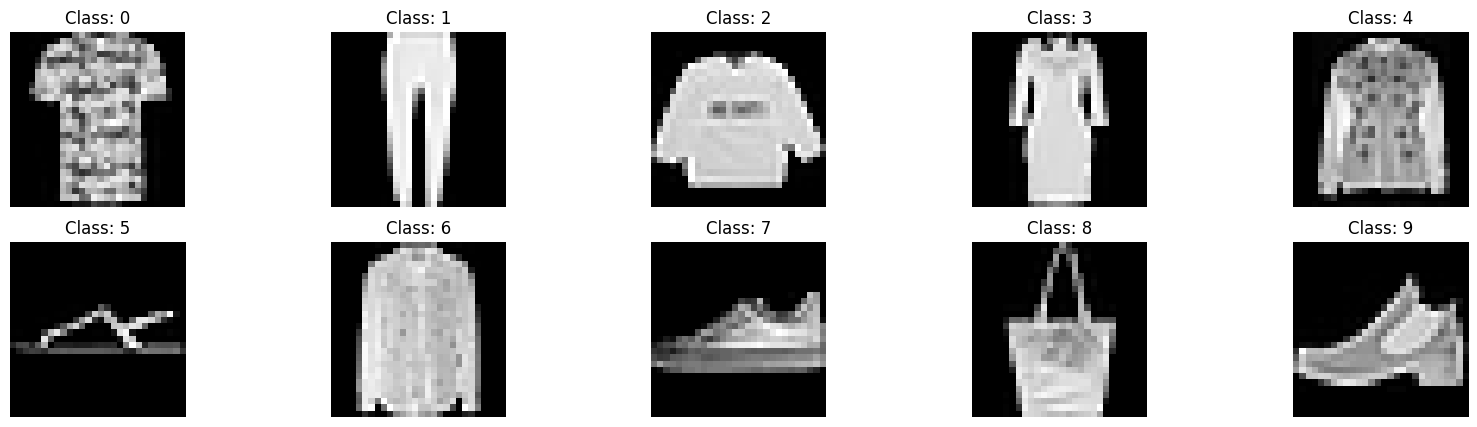

In [6]:
plt.figure(figsize=(20,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = dfTrain[dfTrain.label==i].iloc[0,1:].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis('off')

plt.show()

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
import numpy as np

X_train = X_train.values
X_test = X_test.values

X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)


X_train Shape:  (60000, 28, 28, 1)
X_test Shape:  (10000, 28, 28, 1)


In [ ]:


Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

print("Y_train Shape: ", Y_train.shape)
print("Y_test Shape: ", Y_test.shape)


Y_train Shape:  (60000, 10)
Y_test Shape:  (10000, 10)


In [13]:
from sklearn.model_selection import train_test_split



x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train,
    test_size=0.3,
    random_state=42,
    stratify=Y_train
)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

x_train shape: (42000, 28, 28, 1)
x_val shape: (18000, 28, 28, 1)
y_train shape: (42000, 10)
y_val shape: (18000, 10)


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

num_classes = y_train.shape[1]

model = Sequential()

# Block 1
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Classifier
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 870,634 (3.32 MB)

 Trainable params: 870,634 (3.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam

optimizer = Adam(
    learning_rate=0.001,   # lr پیش‌فرض
    beta_1=0.9,            # ضریب ممنتوم اول
    beta_2=0.999,          # ضریب ممنتوم دوم
    epsilon=1e-07,         # برای پایداری عددی
    decay=0.0,             # معمولا صفر می‌گذاریم، می‌توانی lr_scheduler جدا استفاده کنی
    amsgrad=False          # معمولا False بهتره
)

# کامپایل مدل
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',   
    metrics=['accuracy']
)

# تنظیمات آموزش
epochs = 50
batchSize = 300

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    featurewise_center=False,             # معمولاً False (برای نرمال‌سازی کل دیتاست)
    samplewise_center=False,              # هر نمونه جدا نرمال نشه
    featurewise_std_normalization=False,  # تقسیم بر std کل دیتاست
    samplewise_std_normalization=False,   # تقسیم بر std هر تصویر
    zca_whitening=False,                  # خیلی به ندرت برای تصاویر ساده مثل MNIST استفاده میشه
    rotation_range=10,                    # چرخش تصادفی تا 10 درجه
    zoom_range=0.1,                       # بزرگ/کوچک شدن تصادفی تا 10%
    width_shift_range=0.1,                # جابه‌جایی افقی تا 10%
    height_shift_range=0.1,               # جابه‌جایی عمودی تا 10%
    horizontal_flip=False,                # برای MNIST خوب نیست
    vertical_flip=False                   # برای MNIST خوب نیست
)

datagen.fit(x_train)


In [24]:

cnn = model.fit(
    datagen.flow(x_train, y_train, batch_size=batchSize),
    epochs=epochs,
    validation_data=(x_val, y_val),
    steps_per_epoch=x_train.shape[0] // batchSize,
    verbose=1
)

print("Train Accuracy after fitting: {:.2f}%".format(cnn.history['accuracy'][-1] * 100))
print("Validation Accuracy after fitting: {:.2f}%".format(cnn.history['val_accuracy'][-1] * 100))


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.5383 - loss: 1.2408 - val_accuracy: 0.7936 - val_loss: 0.5220
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.7621 - loss: 0.6328 - val_accuracy: 0.8294 - val_loss: 0.4345
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - accuracy: 0.7919 - loss: 0.5415 - val_accuracy: 0.8516 - val_loss: 0.3881
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.8128 - loss: 0.4938 - val_accuracy: 0.8711 - val_loss: 0.3371
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.8267 - loss: 0.4628 - val_accuracy: 0.8701 - val_loss: 0.3348
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.8381 - loss: 0.4316 - val_accuracy: 0.8796 - val_loss: 0.3154
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.8465 - loss: 0.4160 - val_accuracy: 0.8873 - val_loss: 0.3000
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.8532 - loss: 0.3974 - val

In [28]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# 1) لود دیتاست
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 2) نرمال‌سازی و تغییر شکل
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# اضافه کردن کانال (28,28,1)
X_train = X_train[..., np.newaxis]
X_test  = X_test[..., np.newaxis]

# 3) One-Hot Encoding
num_classes = 10
Y_train = to_categorical(y_train, num_classes)
Y_test  = to_categorical(y_test, num_classes)

# 4) ارزیابی مدل
score = model.evaluate(X_test, Y_test, verbose=0)

print("Test Loss: {:.4f}".format(score[0]))
print("Test Accuracy: {:.2f}%".format(score[1] * 100))



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Test Loss: 0.1649
Test Accuracy: 93.94%


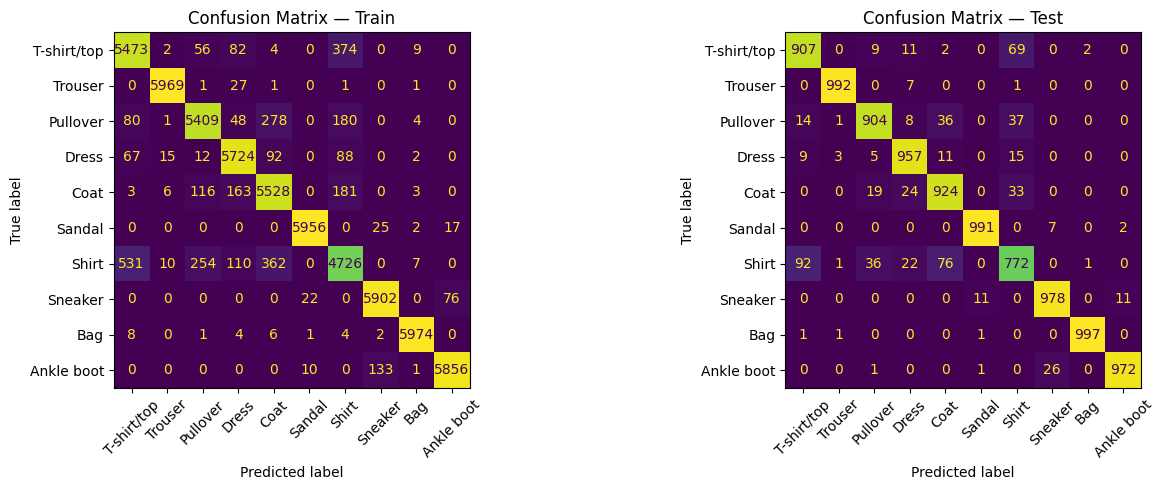

Train Accuracy from CM: 94.19%
Test  Accuracy from CM: 93.94%


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ----- 1) کمک‌کننده‌ها: تبدیل برچسب‌ها (one-hot یا ساده) به اندیس کلاس -----
def to_class_indices(y):
    """
    y می‌تواند one-hot (شکل: [N, C]) یا اندیسی (شکل: [N]) باشد.
    خروجی: آرایه‌ی 1بعدی از اندیس کلاس‌ها
    """
    y = np.asarray(y)
    if y.ndim == 2:      # one-hot
        return np.argmax(y, axis=1)
    return y             # اندیسی

# ----- 2) نام کلاس‌ها (در صورت استفاده از Fashion-MNIST مفید است) -----
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]


X_train_eval = X_train
y_train_eval = y_train

# خروجی مدل softmax است → argmax می‌گیریم
y_pred_train = np.argmax(model.predict(X_train_eval, verbose=0), axis=1)
y_true_train = to_class_indices(y_train_eval)

y_pred_test = np.argmax(model.predict(X_test, verbose=0), axis=1)
y_true_test = to_class_indices(Y_test if 'Y_test' in globals() else y_test)  # هر دو حالت را پوشش می‌دهد

# ----- 4) محاسبه ماتریس‌های درهم‌ریختگی -----
cm_train = confusion_matrix(y_true_train, y_pred_train, labels=range(10))
cm_test  = confusion_matrix(y_true_test,  y_pred_test,  labels=range(10))

# ----- 5) رسم با matplotlib -----
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

disp_tr = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_names)
disp_tr.plot(ax=axes[0], xticks_rotation=45, colorbar=False)
axes[0].set_title("Confusion Matrix — Train")

disp_te = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_names)
disp_te.plot(ax=axes[1], xticks_rotation=45, colorbar=False)
axes[1].set_title("Confusion Matrix — Test")

plt.tight_layout()
plt.show()

# ----- 6) دقت کلی برای اطمینان -----
train_acc = (y_pred_train == y_true_train).mean() * 100
test_acc  = (y_pred_test  == y_true_test ).mean() * 100
print(f"Train Accuracy from CM: {train_acc:.2f}%")
print(f"Test  Accuracy from CM: {test_acc:.2f}%")
